# Multi-Classification Modeling with top 5 beacons with DNN
## Index
- Load data & import modules
- Preprocessing & split
- DNN modeling
- Ploting 
- Confusion Matrix



# Load data & import moduels
- tensorflow version 2.9.1 required

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/purdue/classification/data_with_direction

/content/drive/MyDrive/purdue/classification/data_with_direction


In [4]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.8.2


# Preprocessing & split
- Concat all the data
- split into 7:3

In [7]:
datas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'aos_clf_data_5_concated{data[0]}0{index}.csv'))
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'aos_clf_data_5_concated{data[0]}{index}.csv'))
    datas.append(no_supervised)

In [10]:
result = pd.concat(datas)

In [13]:
result.loc[result['location'] == 'A011', 'location'] = 'A11'
result.loc[result['location'] == 'A010', 'location'] = 'A10'

In [14]:
result.drop('Unnamed: 0', axis=1, inplace=True)

# DNN modeling
- Multi-Classification with Top 5 beacons


# Hyperparameter Tuning
- Normalization : Weight Normalization
- learning rate : [0.01, 0.001, 0.0001]
- loss: categorical_crossentropy
- Optimaization: Adam
- epoch: 50
- output layer: 31
- activation: Relu
- activation: Softmax

# Result
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.001.

- loss: 0.2533
- accuracy: 0.9192
- precision: 0.9229
- recall: 0.9146
- f1_score: 0.9144 
- 478ms/epoch - 2ms/step

In [24]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result.iloc[:, 1:])
y = le.fit_transform(np.array(result['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
result

,location,001,002,003,004,005,006,007,008,009,...,013,014,015,016,017,018,019,020,021,022
0,S01,-200.0,-79.000000,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-78.00000,-68.00000,-200.0,-200.000000,-200.00000,-200.000000,-200.00000,-53.000000,-200.0,-200.0
1,S01,-200.0,-77.499626,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-77.49988,-69.00025,-200.0,-200.000000,-200.00000,-200.000000,-200.00000,-56.123499,-200.0,-200.0
2,S01,-200.0,-76.332115,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-76.66589,-68.66656,-200.0,-200.000000,-200.00000,-200.000000,-200.00000,-53.000000,-200.0,-200.0
3,S01,-200.0,-77.000250,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-75.99825,-69.89851,-200.0,-200.000000,-200.00000,-200.000000,-200.00000,-53.000000,-200.0,-200.0
4,S01,-200.0,-78.003200,-200.0,-200.0,-200.00000,-200.0,-200.0,-200.0,-200.0,...,-76.39980,-69.25094,-200.0,-200.000000,-200.00000,-200.000000,-200.00000,-53.000000,-200.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,U01,-200.0,-200.000000,-200.0,-200.0,-79.33278,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-72.810616,-65.72886,-65.568830,-78.15104,-200.000000,-200.0,-200.0
851,U01,-200.0,-200.000000,-200.0,-200.0,-79.33278,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-72.792694,-65.93386,-65.534140,-80.39028,-200.000000,-200.0,-200.0
852,U01,-200.0,-200.000000,-200.0,-200.0,-79.33278,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-76.428510,-68.33074,-65.367546,-78.03714,-200.000000,-200.0,-200.0
853,U01,-200.0,-200.000000,-200.0,-200.0,-79.33278,-200.0,-200.0,-200.0,-200.0,...,-200.00000,-200.00000,-200.0,-72.996290,-68.33074,-60.499859,-77.85942,-200.000000,-200.0,-200.0


In [27]:
X = np.asarray(X).astype(np.float32)

In [28]:
X[0]

array([-200.,  -79., -200., -200., -200., -200., -200., -200., -200.,
       -200.,  -74., -200.,  -78.,  -68., -200., -200., -200., -200.,
       -200.,  -53., -200., -200.], dtype=float32)

In [29]:
X.shape

(26183, 22)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,shuffle=True)

In [31]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [32]:
import tensorflow_addons as tfa

In [33]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [34]:
!pip install IPython
import IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [35]:
checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [36]:
tf.random.set_seed(42)
initializer = tf.keras.initializers.HeNormal()

def model_builder(hp):
   model = keras.Sequential()
    
   # Dense layer unit number 32~256
   hp_unit = hp.Int('units', min_value=32, max_value=256, step=32)
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(keras.layers.Dense(31, activation = 'softmax'))

   # (learning rate) = [0.01, 0.001, 0.0001]
   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

   opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
   loss = tf.keras.losses.categorical_crossentropy
   model.compile(optimizer= opt, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=31, average='macro', threshold=0.5)])


   return model

In [37]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 135 kB 5.1 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [38]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30,
                     factor=3,
                     hyperband_iterations=2,
                     directory = 'aos_dnn',
                     project_name = 'aos_clf_5')

In [39]:
tuner.search(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.001.



In [40]:
model_based_tuner = tuner.hypermodel.build(best_hps)
history = model_based_tuner.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_train,y_train), callbacks = [ClearTrainingOutput()])

Epoch 1/50
573/573 [==============================] - 13s 17ms/step - loss: 0.7470 - accuracy: 0.7184 - precision_1: 0.7770 - recall_1: 0.6569 - f1_score: 0.7000 - val_loss: 0.5760 - val_accuracy: 0.7810 - val_precision_1: 0.8433 - val_recall_1: 0.7668 - val_f1_score: 0.7749
Epoch 2/50
573/573 [==============================] - 8s 14ms/step - loss: 0.5306 - accuracy: 0.7968 - precision_1: 0.8374 - recall_1: 0.7535 - f1_score: 0.7822 - val_loss: 0.4614 - val_accuracy: 0.8234 - val_precision_1: 0.8478 - val_recall_1: 0.8137 - val_f1_score: 0.8160
Epoch 3/50
573/573 [==============================] - 10s 18ms/step - loss: 0.4692 - accuracy: 0.8211 - precision_1: 0.8483 - recall_1: 0.7882 - f1_score: 0.8110 - val_loss: 0.4956 - val_accuracy: 0.8190 - val_precision_1: 0.8436 - val_recall_1: 0.7758 - val_f1_score: 0.7819
Epoch 4/50
573/573 [==============================] - 7s 13ms/step - loss: 0.4077 - accuracy: 0.8456 - precision_1: 0.8641 - recall_1: 0.8225 - f1_score: 0.8388 - val_loss: 

In [41]:
model_based_tuner_dict = history.history
model_based_tuner_dict.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score'])

In [42]:
results = model_based_tuner.evaluate(X_test,  y_test, verbose=2)

246/246 - 0s - loss: 0.2533 - accuracy: 0.9192 - precision_1: 0.9229 - recall_1: 0.9146 - f1_score: 0.9144 - 478ms/epoch - 2ms/step


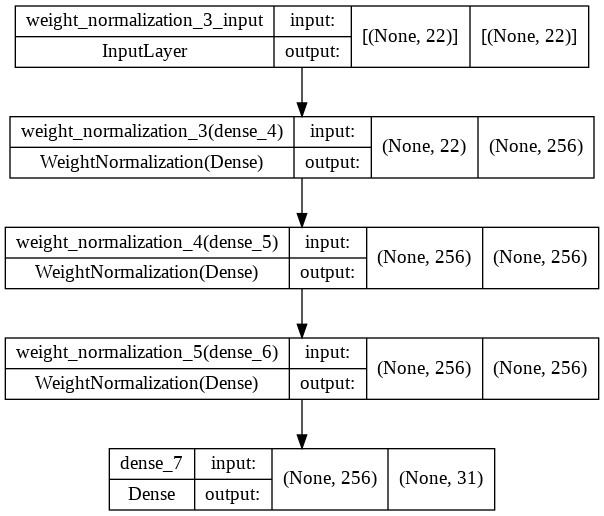

In [43]:
keras.utils.plot_model(model_based_tuner, "aos_beacon5_DNN.png", show_shapes=True)

# Ploting 

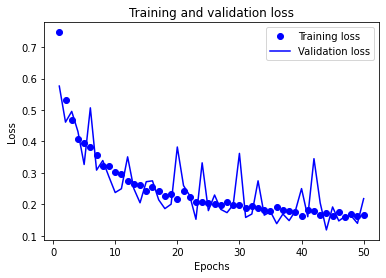

In [44]:
acc = model_based_tuner_dict['accuracy']
val_acc = model_based_tuner_dict['val_accuracy']
loss = model_based_tuner_dict['loss']
val_loss = model_based_tuner_dict['val_loss']
recall = model_based_tuner_dict['recall_1']
val_recall = model_based_tuner_dict['val_recall_1']
f1_score = model_based_tuner_dict['f1_score']
val_f1_score = model_based_tuner_dict['val_f1_score']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

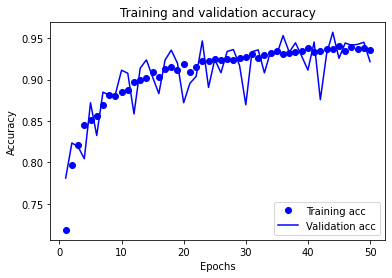

In [45]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

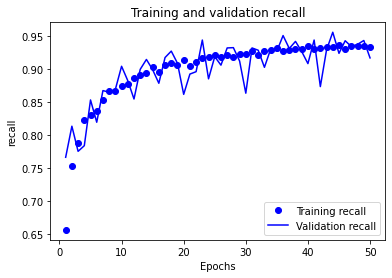

In [46]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, recall, 'bo', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()

plt.show()

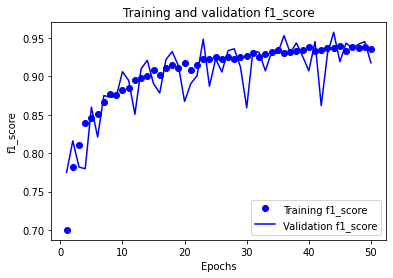

In [47]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, f1_score, 'bo', label='Training f1_score')
plt.plot(epochs, val_f1_score, 'b', label='Validation f1_score')
plt.title('Training and validation f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()

plt.show()

# Confusion Matrix

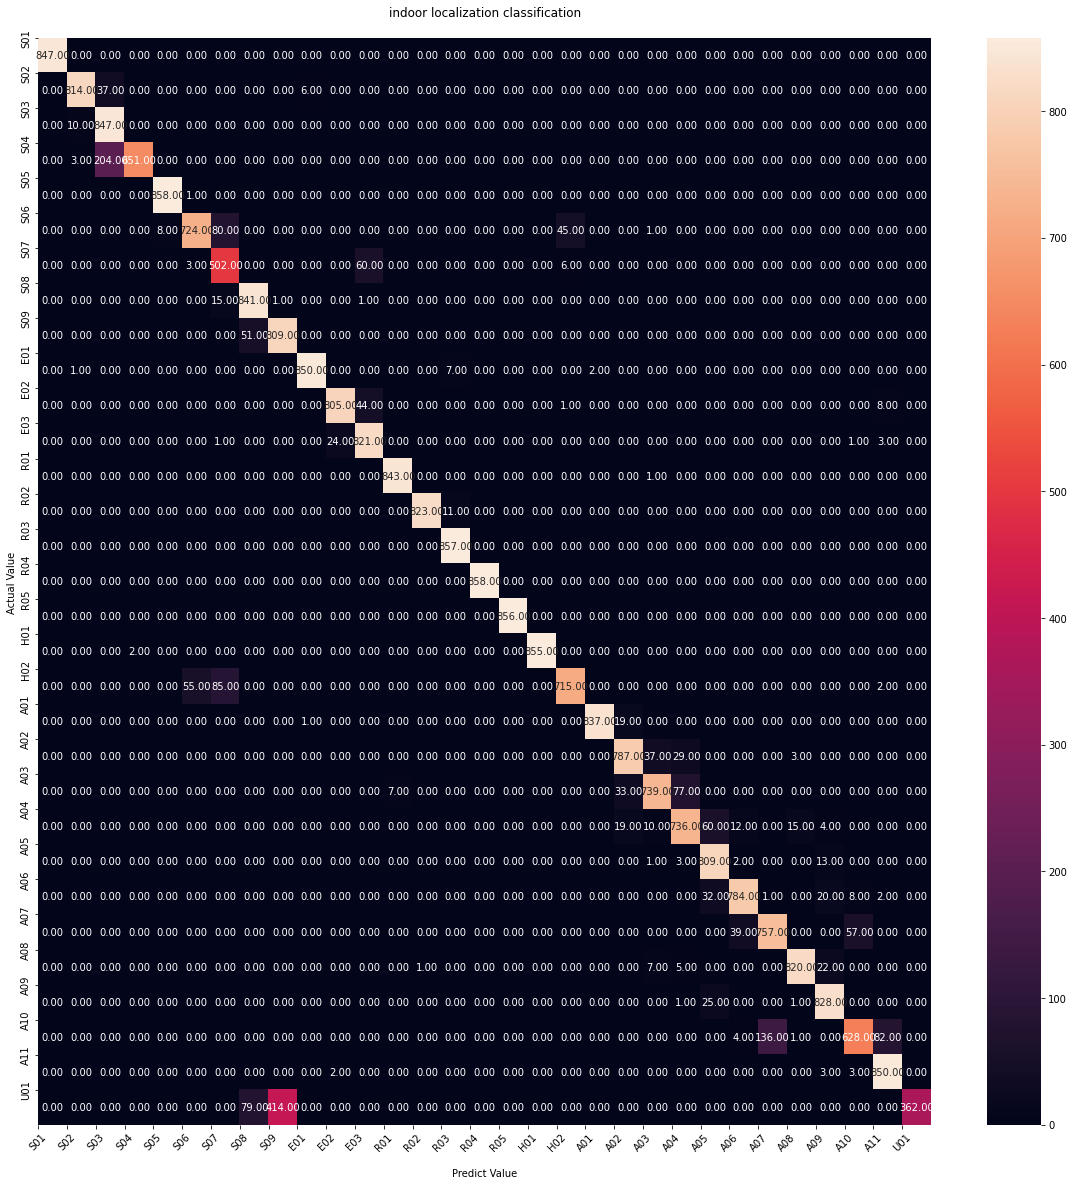

In [48]:
from sklearn.metrics import confusion_matrix
labels = ['S01','S02', 'S03','S04','S05','S06','S07','S08','S09', 'E01','E02','E03', 'R01', 'R02', 'R03', 'R04',
           'R05', 'H01', 'H02', 'A01', 'A02', 'A03','A04','A05','A06','A07','A08','A09','A10', 'A11', 'U01']

y_test_arg = np.argmax(y,axis=1)
y_test = le.inverse_transform(y_test_arg)
Y_pred = np.argmax(model_based_tuner.predict(X),axis=1)
Y_pred = le.inverse_transform(Y_pred)


tick_marks = np.arange(len(labels))
cf_matrix = confusion_matrix(y_test, Y_pred, labels = labels)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True, fmt='.2f')
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
# Convert model to tflite format to import to mobile device
model_based_tuner.save('aos_clf_beacon5')
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir="aos_clf_beacon5")
converter.experimental_enable_resource_variables = True
tflite_model = converter.convert()
with open('aos_clf_beacon5.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: aos_clf_beacon5/assets


INFO:tensorflow:Assets written to: aos_clf_beacon5/assets


# Test_data

In [49]:
# Test Dataset
testdatas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/{data[0]}0{index}.csv'))
      no_supervised.drop('Date', axis=1, inplace=True)
      no_supervised.drop('CompassValue', axis=1, inplace=True)
      no_supervised.drop('CompassString', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/{data[0]}{index}.csv'))
      no_supervised.drop('Date', axis=1, inplace=True)
      no_supervised.drop('CompassValue', axis=1, inplace=True)
      no_supervised.drop('CompassString', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}{index}')
    testdatas.append(no_supervised)

def tominus200(x) :
  if float(x) <= -90 :
    return -200
  return float(x)

beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
for data in testdatas:
  for beacon in beacons:
    data[beacon] = data[beacon].apply(tominus200)

In [50]:
for data in testdatas:
  for row_index in range(len(data)):
    if row_index % 2 == 1:
      for col_index in range(1, len(data.columns)):
        if data.iloc[row_index - 1, col_index] > data.iloc[row_index, col_index]:
          data.iloc[row_index, col_index] = data.iloc[row_index - 1, col_index]

In [51]:
# 상위 5개를 통해서 classification 하기
for data in testdatas:
  for row_index in range(len(data)):
    column_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    a = sorted(data.loc[row_index].tolist()[1:])
    b = list(a)[-5:]
    isMax = [0]
    for i in range(len(data.columns)):
      for num in b:
        if data.loc[row_index][i] == num:
          isMax.append(i)

    remove_set = set(isMax)
    column_idx = [i for i in column_idx if i not in remove_set]
    data.iloc[[row_index], column_idx] = [-200 for i in range(len(column_idx))]

In [52]:
for index in range(len(testdatas)):
  testdatas[index] = testdatas[index].iloc[1::2,:]

In [53]:
for index in range(len(testdatas)):
  testdatas[index].reset_index(inplace=True)

In [54]:
for index in range(len(testdatas)):
  testdatas[index].drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
result_test = pd.concat(testdatas)

In [58]:
result_test.reset_index(inplace=True)
result_test.drop('index', axis=1, inplace=True)

In [106]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result_test.iloc[:, 1:])
y = le.fit_transform(np.array(result_test['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


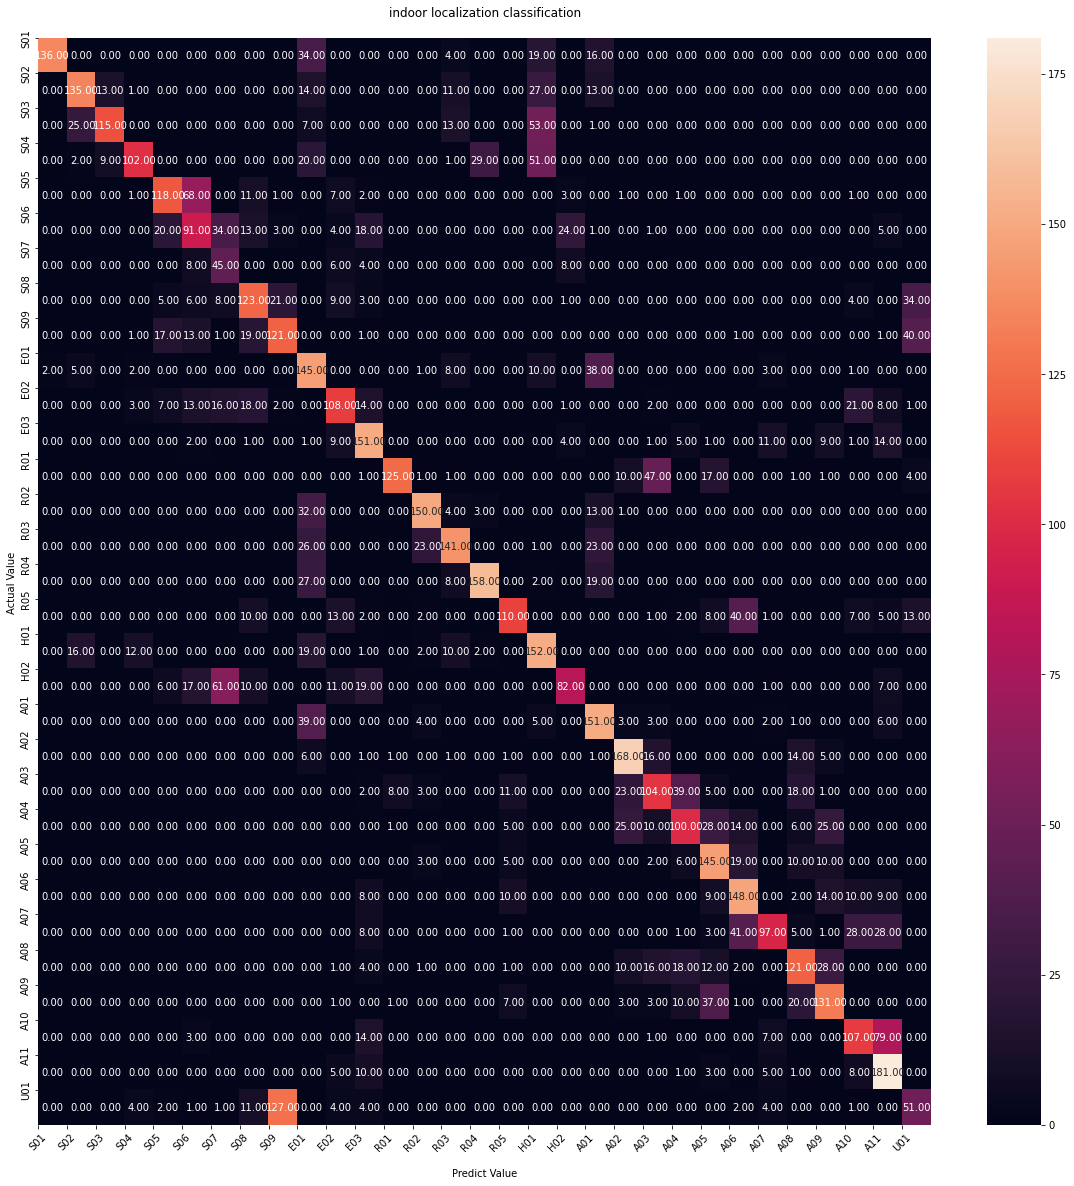

In [107]:
from sklearn.metrics import confusion_matrix
labels = ['S01','S02', 'S03','S04','S05','S06','S07','S08','S09', 'E01','E02','E03', 'R01', 'R02', 'R03', 'R04',
           'R05', 'H01', 'H02', 'A01', 'A02', 'A03','A04','A05','A06','A07','A08','A09','A10', 'A11', 'U01']

y_test_arg2 = np.argmax(y,axis=1)
y_test2 = le.inverse_transform(y_test_arg2)
Y_pred2_arg = np.argmax(model_based_tuner.predict(X),axis=1)
Y_pred2 = le.inverse_transform(Y_pred2_arg)

tick_marks = np.arange(len(labels))
cf_matrix = confusion_matrix(y_test2, Y_pred2, labels = labels)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True, fmt='.2f')
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [110]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("f1score: ", f1_score(y_true=y_test2, y_pred=Y_pred2, average='weighted'))
print("accuracy: ", accuracy_score(y_true=y_test2, y_pred=Y_pred2))
print("precision: ", precision_score(y_true=y_test2, y_pred=Y_pred2, average='weighted'))
print("recall: ", recall_score(y_true=y_test2, y_pred=Y_pred2,  average='weighted'))

f1score:  0.5937311516479508
accuracy:  0.5916498525531585
precision:  0.6251617759213256
recall:  0.5916498525531585


In [111]:
from sklearn.metrics import classification_report
report = classification_report(y_test2, Y_pred2, target_names=labels)

In [112]:
print(report)

              precision    recall  f1-score   support

         S01       0.55      0.71      0.62       214
         S02       0.69      0.79      0.73       214
         S03       0.50      0.49      0.49       214
         S04       0.55      0.47      0.50       214
         S05       0.54      0.72      0.62       200
         S06       0.55      0.70      0.62       210
         S07       0.74      0.46      0.56       213
         S08       0.61      0.57      0.59       214
         S09       0.58      0.61      0.60       214
         E01       0.57      0.51      0.53       211
         E02       0.53      0.85      0.65       214
         E03       0.39      0.67      0.50       215
         R01       0.61      0.50      0.55       214
         R02       0.57      0.72      0.63       210
         R03       0.47      0.71      0.57       214
         R04       0.67      0.38      0.49       214
         R05       0.92      0.60      0.73       208
         H01       0.79    